**# Takes all definitions from the module and places them into current workspace**

In [ ]:
import pandas as pd
import keras
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, Input
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.sequence import pad_sequences
import time

**# Open Main Directory**

In [ ]:
cd /content/drive/MyDrive/Colab Notebooks/NLP

/content/drive/MyDrive/Colab Notebooks/NLP


**# Import Dataset**

In [ ]:
data = pd.read_csv("Corona_NLP.csv",encoding='latin1')
data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


**# Drop Columns Unused**

In [ ]:
data = data.drop(columns=['UserName','ScreenName','Location','TweetAt'])
data.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
data.Sentiment=data.Sentiment.replace({'Extremely Positive':'Positive','Extremely Negative':'Negative'})

**# One-Hot Encoding**

In [ ]:
category = pd.get_dummies(data.Sentiment)
new_data = pd.concat([data, category], axis=1)
new_data = new_data.drop(columns='Sentiment')
new_data

,OriginalTweet,Negative,Neutral,Positive
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,0,1,0
1,advice Talk to your neighbours family to excha...,0,0,1
2,Coronavirus Australia: Woolworths to give elde...,0,0,1
3,My food stock is not the only one which is emp...,0,0,1
4,"Me, ready to go at supermarket during the #COV...",1,0,0
...,...,...,...,...
41152,Airline pilots offering to stock supermarket s...,0,1,0
41153,Response to complaint not provided citing COVI...,1,0,0
41154,You know itÂs getting tough when @KameronWild...,0,0,1
41155,Is it wrong that the smell of hand sanitizer i...,0,1,0


**# Convert DataFrame to Array**

In [ ]:
ori_tweet = new_data['OriginalTweet'].values
label = new_data[['Negative', 'Neutral', 'Positive']].values

**# Plotting Class of Sentiment**

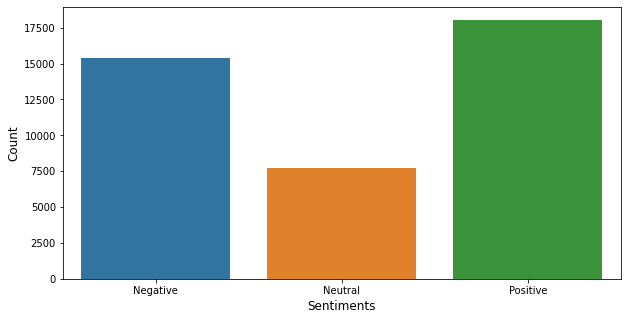

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='Sentiment', data=data, order=['Negative', 'Neutral', 'Positive'])
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Sentiments",fontsize = 12)
plt.show()

**# Split Dataset**

In [ ]:
oritweet_train, oritweet_test, label_train, label_test = train_test_split(ori_tweet, label, test_size=0.2)

**# Create Tokenizer, Convert Sample to Sequences**

In [ ]:
tokenizer = Tokenizer(num_words=20000, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', oov_token='x')
tokenizer.fit_on_texts(oritweet_train) 
tokenizer.fit_on_texts(oritweet_test)
 
sekuens_train = tokenizer.texts_to_sequences(oritweet_train)
sekuens_test = tokenizer.texts_to_sequences(oritweet_test)
 
padded_train = pad_sequences(sekuens_train)
padded_test = pad_sequences(sekuens_test)

**# Create NLP Model**

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=20000, output_dim=200),
    tf.keras.layers.LSTM(128, return_sequences = True, dropout=0.25),
    tf.keras.layers.LSTM(64, dropout=0.1),
    tf.keras.layers.Dense(512, activation='relu',kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(64, activation='relu',kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(3, activation='softmax')
    ])

model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, None, 200)         4000000   
_________________________________________________________________
lstm_23 (LSTM)               (None, None, 128)         168448    
_________________________________________________________________
lstm_24 (LSTM)               (None, 64)                49408     
_________________________________________________________________
dense_36 (Dense)             (None, 512)               33280     
_________________________________________________________________
dense_37 (Dense)             (None, 128)               65664     
_________________________________________________________________
dropout_24 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 64)              

**# Define Loss, Optimizer & Compile the Model**

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

**# Create Callback**

In [ ]:
callbacks =([tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', patience=2, verbose=1),
             tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, verbose=1)
])

**# Training the Model**

In [ ]:
start = time.time()

history = model.fit(padded_train, label_train, epochs=10, 
                    validation_data=(padded_test, label_test),
                    callbacks=callbacks,
                    verbose=1)

end = time.time()

elapsed_time = end - start
time.strftime("Time Elapsed: %H:%M:%S", time.gmtime(elapsed_time))

Epoch 1/10
1029/1029 [==============================] - 52s 48ms/step - loss: 0.8127 - accuracy: 0.6537 - val_loss: 0.5546 - val_accuracy: 0.8089
Epoch 2/10
1029/1029 [==============================] - 49s 47ms/step - loss: 0.4137 - accuracy: 0.8695 - val_loss: 0.4104 - val_accuracy: 0.8678
Epoch 3/10
1029/1029 [==============================] - 49s 47ms/step - loss: 0.2685 - accuracy: 0.9201 - val_loss: 0.4182 - val_accuracy: 0.8653
Epoch 4/10
1029/1029 [==============================] - 49s 48ms/step - loss: 0.1914 - accuracy: 0.9461 - val_loss: 0.4587 - val_accuracy: 0.8711
Epoch 00004: early stopping


'Time Elapsed: 00:03:18'

**# Plotting Accuracy & Validation Accuracy**

Training Accuracy: 0.946090
Validation Accuracy: 0.871113


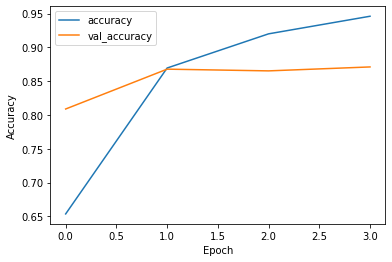

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

print('Training Accuracy: %f' % history.history['accuracy'][-1])
print('Validation Accuracy: %f' % history.history['val_accuracy'][-1])

**# Plotting Loss & Validation Loss**

Training Loss: 0.191414
Validation Loss: 0.458680


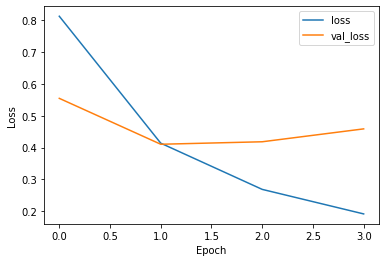

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

print('Training Loss: %f' % history.history['loss'][-1])
print('Validation Loss: %f' % history.history['val_loss'][-1])